![PyTorch](https://devblogs.nvidia.com/wp-content/uploads/2017/04/pytorch-logo-dark.png)

An open source machine learning framework that accelerates the path from research prototyping to production deployment.



# Tensor - Pytorch's core data structure

In Python we can create lists, lists of lists, lists of lists and so on. In NumPy there is a `numpy.ndarray` which represents `n`- dimensional array. In math there is a special name for the generalization of vectors and matrices to a higher dimensional space - a tensor

Tensor is an entity with a defined number of dimensions called an order (rank). 

**Scalar** can be considered as a rank-0-tensor. 

**Vector** can be introduced as a rank-1-tensor. 

**Matrices** can be considered as a rank-2-tensor.

# Tensor Basics

Let's import the torch module first.

In [1]:
import numpy as np
import torch

## Tensor Creation
Let's view examples of matrices and tensors generation

2-dimensional (rank-2) tensor of zeros:

In [2]:
torch.zeros(3, 4)

tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])

Random rank-3 tensor:
_read the print below and convince yourself how this is a rank-3-tensor and learn what those 2, 3, 4 values are there for_

In [3]:
torch.rand(2, 3, 4)

tensor([[[0.8356, 0.2432, 0.0916, 0.0864],
         [0.4052, 0.8141, 0.4873, 0.8493],
         [0.9088, 0.3423, 0.4827, 0.4036]],

        [[0.5679, 0.5801, 0.1599, 0.0640],
         [0.8669, 0.3993, 0.7954, 0.8155],
         [0.4166, 0.2846, 0.8023, 0.1904]]])

I am hoping you have noticed 4-elements in a row, 3 rows making one block and there are 2 blocks. 

Random rank-4-tensor:

In [4]:
torch.rand(2, 2, 2, 3)

tensor([[[[0.4095, 0.0577, 0.4151],
          [0.2082, 0.9093, 0.9992]],

         [[0.2805, 0.0417, 0.9529],
          [0.1765, 0.9005, 0.1056]]],


        [[[0.1817, 0.5076, 0.9553],
          [0.9740, 0.6024, 0.2842]],

         [[0.1154, 0.9184, 0.6759],
          [0.7709, 0.0352, 0.8953]]]])

## Question 1:

How many dimensions are there in a tensor defined as below?

In [5]:
torch.rand(1, 1, 1, 1)

tensor([[[[0.1274]]]])

In [6]:
len(torch.rand(1, 1, 1, 1).shape)

4

.

---


There are many more ways to create tensor using some restrictions on values it should contatn - for the full reference, please follow the [official docs](https://pytorch.org/docs/stable/torch.html#creation-ops). 


.
---


# Python / NumPy / Pytorch interoperability

You can create tensors from python as well as numpy arrays. You can also convert torch tensors to numpy arrays. So, the interoperability between torch and numpy is pretty good. 

In [7]:
# Simple Python List
python_list = [1, 2]

# Create a numpy array from python list
numpy_array = np.array(python_list)

# Create a torch Tensor from python list
tensor_from_list = torch.tensor(python_list)

# Create a torch Tensor from Numpy array
tensor_from_array = torch.tensor(numpy_array)

# Another way to create a torch Tensor from Numpy array (share same storage)
tensor_from_array_v2 = torch.from_numpy(numpy_array)

# Convert torch tensor to numpy array
array_from_tensor = tensor_from_array.numpy()

print('List:   ', python_list)
print('Array:  ', numpy_array)
print('Tensor: ', tensor_from_list)
print('Tensor: ', tensor_from_array)
print('Tensor: ', tensor_from_array_v2)
print('Array:  ', array_from_tensor)

List:    [1, 2]
Array:   [1 2]
Tensor:  tensor([1, 2])
Tensor:  tensor([1, 2], dtype=torch.int32)
Tensor:  tensor([1, 2], dtype=torch.int32)
Array:   [1 2]


**Difference between** `torch.Tensor` **and** `torch.from_numpy`

Pytorch aims to be an effective library for computations. What does it mean? It means that pytorch avoids memory copying if it can. 

In [8]:
numpy_array[0] = 10

print('Array:  ', numpy_array)
print('Tensor: ', tensor_from_array)
print('Tensor: ', tensor_from_array_v2)

Array:   [10  2]
Tensor:  tensor([1, 2], dtype=torch.int32)
Tensor:  tensor([10,  2], dtype=torch.int32)


## Question 2:

Assume that we moved our complete (cats vs dogs) image dataset to numpy arrays. Then we use torch.from_numpy to convert these images to tensor. Then we apply a specific data augmentation strategy called "CutOut" which blocks a portion of the image directly on these tensors. What will happen to the accuracy of a model trained on this strategy compared to the one without this strategy? CutOut strategy is shown below: 

![CutOut](https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcSnSyN835AmtQPKQbPjDHX-FmshNilbtexX95cRGQPwl56QCGDn)




---




In [9]:
x = np.array([3,5,6,8])
print(x)
tx1 = torch.from_numpy(x)
tx1[0] = 21
print(x)
print(tx1)

[3 5 6 8]
[21  5  6  8]
tensor([21,  5,  6,  8], dtype=torch.int32)


In [10]:
## Question 3:
Why do you think we are observing this behavior?

Object `behavior` not found.


In [ ]:
Why do you think we are observing this behavior

We have two different ways to create tensor from its NumPy counterpart - one copies memory and another one shares the same underlying storage. It works in the opposite way:

In [11]:
array_from_tensor = tensor_from_array.numpy()
print('Tensor: ', tensor_from_array)
print('Array: ', array_from_tensor)

tensor_from_array[0] = 11
print('Tensor: ', tensor_from_array)
print('Array: ', array_from_tensor)

Tensor:  tensor([1, 2], dtype=torch.int32)
Array:  [1 2]
Tensor:  tensor([11,  2], dtype=torch.int32)
Array:  [11  2]


## Data types

The basic data type of all Deep Learning-related operations is float, but sometimes you may need something else. Pytorch support different number types for its tensors the same way NumPy does it - by specifying the data type on tensor creation or via casting. Ths full list of supported data types can be found [here](https://pytorch.org/docs/stable/tensors.html). 

In [12]:
tensor = torch.zeros(2, 2)
print('Tensor with default type: ', tensor)
tensor = torch.zeros(2, 2, dtype=torch.float16)
print('Tensor with 16-bit float: ', tensor)
tensor = torch.zeros(2, 2, dtype=torch.int16)
print('Tensor with integers: ', tensor)
tensor = torch.zeros(2, 2, dtype=torch.bool)
print('Tensor with boolean data: ', tensor)

Tensor with default type:  tensor([[0., 0.],
        [0., 0.]])
Tensor with 16-bit float:  tensor([[0., 0.],
        [0., 0.]], dtype=torch.float16)
Tensor with integers:  tensor([[0, 0],
        [0, 0]], dtype=torch.int16)
Tensor with boolean data:  tensor([[False, False],
        [False, False]])




---


## Question 4:
We saw above that some times numpy and tensors share same storage and changing one changes the other. 
If we define a rank-2-tensor with ones (dtype of f16), and then convert it into a numpy data type using tensor.numpy() and store it in a variable called "num", and then we perform this operation `num = num * 0.5`, will the original tensor have 1.0s or 0.5s as its element values? 


In [89]:
tensor = torch.ones(2, 2, dtype=torch.float16)
print("tensor")
print(tensor)
num = tensor.numpy()
print("numpy array")
print(num)

"""
num[0] = 0.5
print("After Assignment operation")
print("tensor")
print(tensor)
print("numpy array")
print(num)
"""

num = num * 0.5
print("After scalar multiplication")
print("tensor")
print(tensor)
print("numpy array")
print(num)

tensor
tensor([[1., 1.],
        [1., 1.]], dtype=torch.float16)
numpy array
[[1. 1.]
 [1. 1.]]
After scalar multiplication
tensor
tensor([[1., 1.],
        [1., 1.]], dtype=torch.float16)
numpy array
[[0.5 0.5]
 [0.5 0.5]]




---

## Question 5: 
If the operation `num = num*5` is changed to `num[:] = num*5` will the original tensor have 1.0s or 0.5s as its element values? 



---



In [14]:
tensor = torch.zeros(2, 2, dtype=torch.float16)
print("tensor")
print(tensor)
num = tensor.numpy()
print("numpy array")
print(num)
num[0] = 21
print("After Assignment operation")
print("tensor")
print(tensor)
print("numpy array")
print(num)
num[:] = num * 0.5
print("After scalar multiplication")
print("tensor")
print(tensor)
print("numpy array")
print(num)

tensor
tensor([[0., 0.],
        [0., 0.]], dtype=torch.float16)
numpy array
[[0. 0.]
 [0. 0.]]
After Assignment operation
tensor
tensor([[21., 21.],
        [ 0.,  0.]], dtype=torch.float16)
numpy array
[[21. 21.]
 [ 0.  0.]]
After scalar multiplication
tensor
tensor([[10.5000, 10.5000],
        [ 0.0000,  0.0000]], dtype=torch.float16)
numpy array
[[10.5 10.5]
 [ 0.   0. ]]


## Indexing

Tensor provides access to its elements via the same `[]` operation as a regular python list or NumPy array. However, as you may recall from NumPy usage, the full power of math libraries is accessible only via vectorized operations, i.e. operations without explicit looping over all vector elements in python and using implicit optimized loops in C/C++/CUDA/Fortran/etc. available via special function calls. Pytorch employs the same paradigm and provides a wide range of vectorized operations. Let's take a look at some examples. 

Joining a list of tensors together with `torch.cat`

In [15]:
a = torch.zeros(3, 2)
b = torch.ones(3, 2)
print(torch.cat((a, b), dim=0))

tensor([[0., 0.],
        [0., 0.],
        [0., 0.],
        [1., 1.],
        [1., 1.],
        [1., 1.]])




---

## Question 6: 
Is the transpose of concatenated a & b tensor on dimension 1, same as the contatenated tensor of a & b on dimension 0? 



---



In [16]:
print(torch.transpose(torch.cat((a, b), dim=1), 0, 1))

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [1., 1., 1.],
        [1., 1., 1.]])


Indexing with another tenxor/array:

In [17]:
a = torch.arange(start=0, end=10)
indices = np.arange(0, 10) > 5
print(a)
print(indices)
print(a[indices])

indices = torch.arange(start=0, end=10) %5
print(indices)
print(a[indices])

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
[False False False False False False  True  True  True  True]
tensor([6, 7, 8, 9])
tensor([0, 1, 2, 3, 4, 0, 1, 2, 3, 4])
tensor([0, 1, 2, 3, 4, 0, 1, 2, 3, 4])




---

## Question 7:

`a` is defined as `torch.arange(start=0, end=10)`. We will create `b` using the two operations as below. In both cases do we get the same value?


1.   indices variable created by the modulo operation on arange between 0 and 10. Then a new varialble `b` is created from `a` using the last 5 elements of indices. 
2.   indices variable created by the modulo operation on arange betwenn 1 and 11. Then a new varialble `b` is created from `a` using the last 5 elements of indices. 



---




In [18]:
a = torch.arange(start=0, end=10)
print(a)

ind1 = torch.arange(0, 10) % 5
print("ind1", ind1)

b = a[ind1]
print("b", b)

ind2 = torch.arange(1, 11) % 5
print("ind2", ind2) 

b = a[ind2]
print("b", b)

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
ind1 tensor([0, 1, 2, 3, 4, 0, 1, 2, 3, 4])
b tensor([0, 1, 2, 3, 4, 0, 1, 2, 3, 4])
ind2 tensor([1, 2, 3, 4, 0, 1, 2, 3, 4, 0])
b tensor([1, 2, 3, 4, 0, 1, 2, 3, 4, 0])


What should we do if we have, say, rank-2-tensor and want to select only some rows?

In [19]:
tensor = torch.rand((5, 3))
rows = torch.tensor([0, 2])
print(tensor)
tensor = tensor[rows]
print(tensor)

tensor([[0.8763, 0.2203, 0.2498],
        [0.8839, 0.4836, 0.0688],
        [0.4447, 0.1144, 0.4713],
        [0.8688, 0.8801, 0.9459],
        [0.3590, 0.4885, 0.6896]])
tensor([[0.8763, 0.2203, 0.2498],
        [0.4447, 0.1144, 0.4713]])




---

## Question 8: 

Consider a tensor defined as `torch.rand((6, 5))`. Is the shape of the new tensor created by taking the 0th, 2nd and 4th row of the old tensor same as the shape of the a newer tensor created by taking the 0th, 2nd and 4th row of the old tensor after transposing it by operation `torch.transpose(tensor, 0, 1)` ?



---




In [20]:
tensor = torch.rand((6, 5))
print(tensor)
new1 = tensor[[0,2,4]]
print(new1)
temp_tensor = torch.transpose(tensor, 0, 1)
print("transposed")
print(temp_tensor)
new2 = temp_tensor[[0, 2, 4]]
print(new2)

tensor([[0.5409, 0.8757, 0.1191, 0.3406, 0.1177],
        [0.8088, 0.6254, 0.4733, 0.5987, 0.5287],
        [0.8599, 0.9608, 0.9061, 0.1035, 0.4145],
        [0.2484, 0.6849, 0.9527, 0.6856, 0.3083],
        [0.5252, 0.9497, 0.6785, 0.9275, 0.8805],
        [0.5146, 0.7463, 0.3711, 0.8025, 0.6825]])
tensor([[0.5409, 0.8757, 0.1191, 0.3406, 0.1177],
        [0.8599, 0.9608, 0.9061, 0.1035, 0.4145],
        [0.5252, 0.9497, 0.6785, 0.9275, 0.8805]])
transposed
tensor([[0.5409, 0.8088, 0.8599, 0.2484, 0.5252, 0.5146],
        [0.8757, 0.6254, 0.9608, 0.6849, 0.9497, 0.7463],
        [0.1191, 0.4733, 0.9061, 0.9527, 0.6785, 0.3711],
        [0.3406, 0.5987, 0.1035, 0.6856, 0.9275, 0.8025],
        [0.1177, 0.5287, 0.4145, 0.3083, 0.8805, 0.6825]])
tensor([[0.5409, 0.8088, 0.8599, 0.2484, 0.5252, 0.5146],
        [0.1191, 0.4733, 0.9061, 0.9527, 0.6785, 0.3711],
        [0.1177, 0.5287, 0.4145, 0.3083, 0.8805, 0.6825]])


## Tensor Shapes

Reshaping a tensor is a frequently used operation. We can change the shape of a tensor without the memory copying overhead. There are two methods for that: `reshape` and `view`. 

The difference is the following: 


*   view tries to return a tensor, and it shares the same memory with the original tensor. In case, if it cannot reuse the same memory due to [some reason](https://pytorch.org/docs/stable/tensors.html?highlight=view#torch.Tensor.view), it just fails. 
*   reshape always returns the tensor with the desired shape and tries to reuse the memory. If it cannot, it creates a copy

Let's see with the help of an example:

In [21]:
tensor = torch.rand(2, 3, 4)
print('Pointer to data: ', tensor.data_ptr())
print('Shape: ', tensor.shape)

reshaped = tensor.reshape(24)

view = tensor.view(3, 2, 4)
print('Reshaped tensor - pointer to data', reshaped.data_ptr())
print('Reshaped tensor shape ', reshaped.shape)

print('Viewed tensor - pointer to data', view.data_ptr())
print('Viewed tensor shape ', view.shape)

assert tensor.data_ptr() == view.data_ptr()

assert np.all(np.equal(tensor.numpy().flat, reshaped.numpy().flat))

print('Original stride: ', tensor.stride())
print('Reshaped stride: ', reshaped.stride())
print('Viewed stride: ', view.stride())

Pointer to data:  2453944294784
Shape:  torch.Size([2, 3, 4])
Reshaped tensor - pointer to data 2453944294784
Reshaped tensor shape  torch.Size([24])
Viewed tensor - pointer to data 2453944294784
Viewed tensor shape  torch.Size([3, 2, 4])
Original stride:  (12, 4, 1)
Reshaped stride:  (1,)
Viewed stride:  (8, 4, 1)


The basic rule about reshaping the tensor is definitely that you cannot change the total number of elements in it, so the product of all tensor's dimensions should always be the same. It gives us the ability to avoid specifying one dimension when reshaping the tensor - Pytorch can calculate it for us:

In [22]:
print(tensor.reshape(3, 2, 4).shape)
print(tensor.reshape(3, 2, -1).shape)
print(tensor.reshape(3, -1, 4).shape)

torch.Size([3, 2, 4])
torch.Size([3, 2, 4])
torch.Size([3, 2, 4])




---


## Question 9:

Consider a tensor `a` created with [1, 2, 3] and [1, 2, 3] of size (2, 3) is reshaped with operation `.reshape(-1, 2)`. Also consider a tensor `b` created with [[2, 1]] and of size (1, 2), later operated with `view(2, -1)` operation. 

If we do a dot product of a and b (using `torch.mm`) and perform the sum of all the elements (using `torch.sum`) what do we get? (enter int value without any decimal point in the quiz)



---



In [23]:
a = torch.tensor([[1,2,3],[1,2,3]])
print(a.shape)
print(a.reshape(-1,2).shape)

b = torch.tensor([[2,1]])
print(b.shape)
print(b.view(2,-1).shape)

torch.sum(torch.mm(a.reshape(-1,2), b.view(2,-1)))

torch.Size([2, 3])
torch.Size([3, 2])
torch.Size([1, 2])
torch.Size([2, 1])


tensor(18)

**Alternative ways to view tensors** - `expand` or `expand_as`.



*   `expand` - requires the desired shape as an input
*   `expand_as` - uses the shape of another tensor

These operations "repeat" tensor's values along the specified axes without actually copying the data. 

As the documentation says, expand:


> returns a new view of the self tensor with singleton dimensions expanded to a larger size. Tensor can be also expanded to a larger number of dimensions, and the new ones will be appended at the front. For the new dimensions, the size cannot be set to -1. 

**Use case:**



*   index multi-channel tensor with single-channel mask - imagine a color image with 3 channels (RGB) and binary mask for the area of interest on that image. We cannot index the image with this kind of mask directly since the dimensions are different, but we can use `expand_as` operation to create a view of the mask that has the same dimensions as the image we want to apply it to, but has not copied the data. 

torch.Size([3, 256, 256])


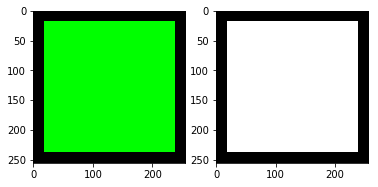

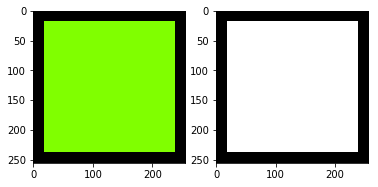

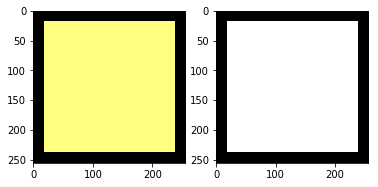

In [24]:
%matplotlib inline
from matplotlib import pyplot as plt

# Create a black image
image = torch.zeros(size=(3, 256, 256), dtype=torch.int)

# Leave the borders and make the rest of the image Green
image[1, 18:256 - 18, 18:256 - 18] = 255

# Create a mask of the same size
mask = torch.zeros(size=(256, 256), dtype=torch.bool)

# Assuming the green region in the original image is the Region of interest, change the mask to white for that area
mask[18:256 - 18, 18:256 - 18] = 1

# Create a view of the mask with the same dimensions as the original image
mask_expanded = mask.expand_as(image)
print(mask_expanded.shape)

mask_np = mask_expanded.numpy().transpose(1, 2, 0) * 255
image_np = image.numpy().transpose(1, 2, 0)

fig, ax = plt.subplots(1, 2)
ax[0].imshow(image_np)
ax[1].imshow(mask_np)
plt.show()

image[0, mask] += 128
fig, ax = plt.subplots(1, 2)
ax[0].imshow(image_np)
ax[1].imshow(mask_np)
plt.show()

image[mask_expanded] += 128
image.clamp_(0, 255)
fig, ax = plt.subplots(1, 2)
ax[0].imshow(image_np)
ax[1].imshow(mask_np)
plt.show()

In the example above, one can also find a couple of useful tricks:


*   `clamp` method and function is a Pytorch's analogue of NumPy's `clip` function
*   many operations on tensors have in-place form, that does not return modified data, but change values in the tensor. The in-place version of the operation has trailing underscore according to Pytorch's naming convension - in the exmaple above it is `clamp_`
*   tensors have the same indexing as Numpy's arrays - one can use `:` seperated range, negative indexes and so on.


.


---

# Images and their representations

Now, let's discuss images, their representations and how different Python librarties work with them. 

Probably, the most well-known library for image loading and simple processing is [Pillow](https://pillow.readthedocs.io/en/stable/). 

However, many people in deep learning area stick with OpenCV for image loading and processing with some usage of another libraries when it is justified by performance/functionality. This is because OpenCV is in general much faster than the other libraries. Here you can find a couple of benchmarks: 

*   https://www.kaggle.com/zfturbo/benchmark-2019-speed-of-image-reading
*   https://github.com/albumentations-team/albumentations#benchmarking-results

To sum up the benchmarks above, there are two most common image formats, PNG and JPEGs. If your data is in PNG format - use OpenCV to read it. If it is in JPEG - use libturbojpeg. For image processing, use OpenCV if possible. _We will be using PIL a lot along with these._

As you will read the code from others, you may find out that some of them use Pillow/something else to read data. You should know, that color image representations in OpenCV and other libraries are different - OpenCV uses "BGR" channel order, while others use "RGB" one. 

To change "BRG" <-> "RGB" the only thing we need to do it to change channel order.

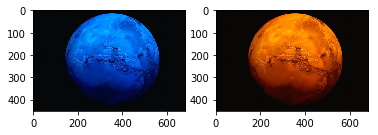

In [25]:
%matplotlib inline
from matplotlib import pyplot as plt
import cv2


bgr_image = cv2.imread('mars.jpg') 
# remember to add your own image in case you run this block, if you want to use the same image, 
# download it from: https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcRCA40ftnscVzfV8ft8e7vIzQXfXeZdtco8nknJrfCUW6INI40U
rgb_image = bgr_image[..., ::-1]
fig, ax = plt.subplots(1, 2)
ax[0].imshow(bgr_image)
ax[1].imshow(rgb_image)
plt.show()

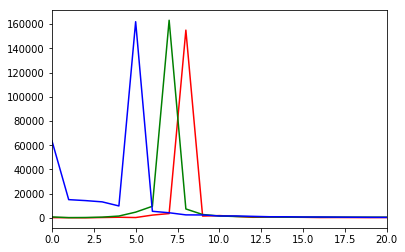

In [30]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

color = ('r','g','b')
for i,col in enumerate(color):
    histr = cv2.calcHist([rgb_image],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,20])
plt.show()



---

## Question 10:

Looking at the results above it can be said that the pixel values in the blue channels would be very small compared to red channel. True/False?


---




In [ ]:
False

# Autograd

Pytorch supports automatic differentiation. The module which implements this is called **AutoGrad**. It calculates the gradients and keeps track in forward and backward passes. For primitive tensors, you need to enable or disable it using the `required_grad` flag. But, for advanced tensors, it is enabled by default

In [31]:
a = torch.rand((3, 5), requires_grad = True)
print(a)
result = a * 5
print(result)

# grad can be implicitly created only for scalar outputs
# so let's calculate the sum here so that the output becomes a scalar and we can apply a backward pass
mean_result = result.sum()
print(mean_result)
# calculate gradient
mean_result.backward()
# print gradient of a
print(a.grad)

tensor([[0.5076, 0.1993, 0.1266, 0.0308, 0.7055],
        [0.4155, 0.8445, 0.4347, 0.7035, 0.1490],
        [0.3641, 0.9469, 0.8411, 0.7839, 0.2220]], requires_grad=True)
tensor([[2.5380, 0.9967, 0.6331, 0.1540, 3.5274],
        [2.0775, 4.2223, 2.1733, 3.5176, 0.7451],
        [1.8203, 4.7343, 4.2056, 3.9196, 1.1101]], grad_fn=<MulBackward0>)
tensor(36.3749, grad_fn=<SumBackward0>)
tensor([[5., 5., 5., 5., 5.],
        [5., 5., 5., 5., 5.],
        [5., 5., 5., 5., 5.]])




---

## Question 11: 

Why the gradient of a is all 5s above?



---



Because, the function a * 5 is differentiated by a which results tensor with 5 in all places since that is a pointwise(scalar) multiplication.

As we see, Pytorch automagically calculated the gradient value for us. It looks to be the correct value - we multiplied an input by 5, so the gradient of this operation equals to 5.

# Disabling Autograd for tensors

We don't need to compute gradients for all the variables that are involved in the pipeline. The Pytorch API provides 2 ways to disable autograd.

`detach` - returns a copy of the tensor with autograd disabled. This 

1.   copy is built on the same memory as the original tensor, so in-place size / stride / storage changes (such as resize_ / resizeas / set / transpose) modifications are not allowed.
2.   torch.no_grad() - It is a context manager that allows you to guard a series of operations from autograd without creating new tensors.

In [33]:
a = torch.rand((3, 5), requires_grad=True)
detached_a = a.detach()
detached_result = detached_a * 5
result = a * 10
# we cannot do backward pass that is required for autograd using multideminsional output,
# so let's calculate the sum here
mean_result = result.sum()
mean_result.backward()
a.grad

tensor([[10., 10., 10., 10., 10.],
        [10., 10., 10., 10., 10.],
        [10., 10., 10., 10., 10.]])

In [77]:
a = torch.rand((3, 5), requires_grad=True)
with torch.no_grad():
    detached_result = a * 5
result = a * 10
# we cannot do backward pass that is required for autograd using multideminsional output,
# so let's calculate the sum here
mean_result = result.sum()
mean_result.backward()
a.grad

tensor([[10., 10., 10., 10., 10.],
        [10., 10., 10., 10., 10.],
        [10., 10., 10., 10., 10.]])

# Custom Network

A fully-connected ReLU network with one hidden layer and no biases, trained to predict y from x by minimizing squared Euclidean distance.

This implementation uses PyTorch tensors to manually compute the forward pass, loss, and backward pass.

A PyTorch Tensor is basically the same as a numpy array: it does not know anything about deep learning or computational graphs or gradients, and is just a generic n-dimensional array to be used for arbitrary numeric computation.

The biggest difference between a numpy array and a PyTorch Tensor is that a PyTorch Tensor can run on either CPU or GPU. To run operations on the GPU, just cast the Tensor to a cuda datatype.

In [84]:
dtype = torch.float
device = torch.device("cpu")
# device = torch.device("cuda:0") # Uncomment this to run on GPU

# N is batch size; D_in is input dimension;
# H is hidden dimension; D_out is output dimension.
N, D_in, H, D_out = 64, 1000, 100, 10

# Create random input and output data
x = torch.randn(N, D_in, device=device, dtype=dtype)
y = torch.randn(N, D_out, device=device, dtype=dtype)

# Randomly initialize weights
w1 = torch.randn(D_in, H, device=device, dtype=dtype)
w2 = torch.randn(H, D_out, device=device, dtype=dtype)

learning_rate = 1e-6
for t in range(500):
    # Forward pass: compute predicted y
    h = x.mm(w1)
    h_relu = h.clamp(min=0)
    y_pred = h_relu.mm(w2)

    # Compute and print loss
    loss = (y_pred - y).pow(2).sum().item()
    print(t, loss)

    # Backprop to compute gradients of w1 and w2 with respect to loss
    grad_y_pred = 2*(y_pred - y)
    grad_w2 = h_relu.t().mm(grad_y_pred)
    grad_h_relu = grad_y_pred.mm(w2.t())
    grad_h = grad_h_relu.clone()
    grad_h[h < 0] = 0
    grad_w1 = x.t().mm(grad_h)

    # Update weights using gradient descent
    w1 -= learning_rate * grad_w1
    w2 -= learning_rate * grad_w2

0 26814990.0
1 22161376.0
2 22304444.0
3 23938078.0
4 24363852.0
5 21931536.0
6 16717548.0
7 10944704.0
8 6418833.0
9 3639837.25
10 2119966.0
11 1331774.125
12 915639.375
13 684021.375
14 543233.125
15 449276.15625
16 381070.5625
17 328286.34375
18 285669.78125
19 250262.4375
20 220315.15625
21 194744.484375
22 172732.78125
23 153667.75
24 137058.015625
25 122518.921875
26 109760.546875
27 98527.5
28 88605.875
29 79826.875
30 72031.25
31 65091.9453125
32 58910.82421875
33 53385.40234375
34 48440.68359375
35 44004.06640625
36 40017.83203125
37 36432.6875
38 33202.15234375
39 30286.861328125
40 27653.03515625
41 25271.369140625
42 23117.0703125
43 21165.37109375
44 19393.458984375
45 17783.330078125
46 16318.578125
47 14985.05078125
48 13769.6015625
49 12661.21875
50 11649.31640625
51 10724.888671875
52 9879.474609375
53 9105.7255859375
54 8397.4892578125
55 7748.353515625
56 7153.1787109375
57 6607.1083984375
58 6105.80908203125
59 5645.32666015625
60 5222.11474609375
61 4832.8579101562

443 9.075612615561113e-05
444 8.902360423235223e-05
445 8.782826625974849e-05
446 8.668214286444709e-05
447 8.503262506565079e-05
448 8.348283154191449e-05
449 8.215155685320497e-05
450 8.120801066979766e-05
451 8.002699178177863e-05
452 7.879202166805044e-05
453 7.720519352005795e-05
454 7.624408317497e-05
455 7.532630843343213e-05
456 7.434551662299782e-05
457 7.287937478395179e-05
458 7.18643786967732e-05
459 7.102439121808857e-05
460 7.007649401202798e-05
461 6.91352179273963e-05
462 6.793480861233547e-05
463 6.717779615428299e-05
464 6.606556416954845e-05
465 6.502141332020983e-05
466 6.405870226444677e-05
467 6.30973736406304e-05
468 6.241200026124716e-05
469 6.144939106889069e-05
470 6.081008177716285e-05
471 5.968811456114054e-05
472 5.900389078306034e-05
473 5.8227728004567325e-05
474 5.762717773905024e-05
475 5.683349445462227e-05
476 5.5864427849883214e-05
477 5.546909596887417e-05
478 5.4888660088181496e-05
479 5.409613004303537e-05
480 5.356152541935444e-05
481 5.278170647



---
## Question 12

In the code above, why do we have 2 in '2.0*(y_pred - y)`?

gradient of (y_pred - y)^2

## Question 13
In the code above, what does `grad_h[h < 0] = 0` signify?

[64 x 1000]  -->  [64 x 1000] * w1[1000 x 100] --> [64 x 100]relu --> [64 x 100] --> [64 x 100] * w2[100 x 10] --> [64 x 10]

 input1                   forward1                     relu             input2                forward2              output    

step 1

delta_w2 = [100 x 64] (input2 transpose) * [64 x 10] (gradient) = [100 x 10]

step 2

back1 = [64 x 10] (gradient) * [10 x 100] (w2 transpose) = [64 x 100]

if there was no relu then -->  [1000 x 64] (input1 transpose) * [64 x 100] (back1) will give the delta_w1 [1000 x 100]

But since we have ReLU which filters any negative values we should not update the weights that results in negative values during forward1 ([64 x 1000] * w1[1000 x 100]), by making the gradients(back1) to zero in the index positions where the forward1 resulted in negative values, we effectively allow the gradients to pass via ReLU i.e. f'(0) = 0 , f'(x) = x.

After the above step

delta_w1 = [1000 x 64] (input1 transpose) * [64 x 100] (back1) = [1000 x 100] 


## Question 14
In the code above, how many "epochs" have we trained the model for? 

500

## Question 15
In the code above, if we take the trained model, and run it on fresh  inputs, the trained model will be able to predict fresh output with high accuracy.

May or May Not, Since we have no validation data to ensure that the model would perform on new inputs

## Question 16
In the code above, if we dont use clone in `grad_h = grad_h_relu.clone()` the model will still train without any issues. 

In this example it will train because the gradient is calculated manually and the Autograd is disabled for the tensors.